In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("reviews.csv")
print(df.head())
print(df['Sentiment'].value_counts())


                                         Review Text Sentiment
0  The product quality is excellent and I am very...  positive
1       Terrible experience, I will never buy again.  negative
2  Amazing service, fast delivery and great packa...  positive
3  The item was damaged and customer support was ...  negative
4     Good value for the money, highly recommend it.  positive
Sentiment
positive    5
negative    5
Name: count, dtype: int64


In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added download for punkt_tab

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters/numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords + Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Cleaned_Review'] = df['Review Text'].apply(preprocess_text)
print(df[['Review Text','Cleaned_Review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                         Review Text  \
0  The product quality is excellent and I am very...   
1       Terrible experience, I will never buy again.   
2  Amazing service, fast delivery and great packa...   
3  The item was damaged and customer support was ...   
4     Good value for the money, highly recommend it.   

                                  Cleaned_Review  
0            product quality excellent satisfied  
1                  terrible experience never buy  
2  amazing service fast delivery great packaging  
3        item damaged customer support unhelpful  
4              good value money highly recommend  


In [9]:
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['Cleaned_Review']).toarray()
y = df['Sentiment'].map({'positive':1, 'negative':0})


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

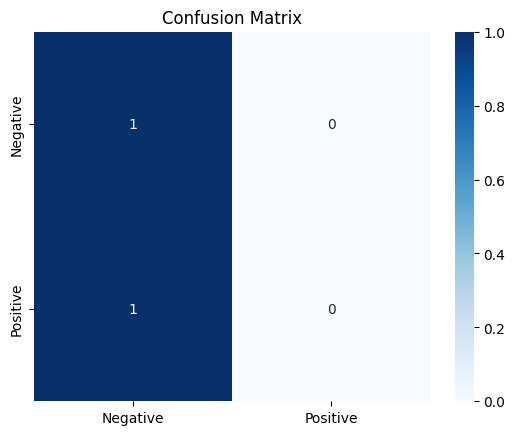

In [11]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.show()


In [12]:
df_test = pd.DataFrame({'Review': df['Review Text'].iloc[y_test.index],
                        'Actual': y_test,
                        'Predicted': y_pred})

print("Correctly Classified:")
print(df_test[df_test['Actual'] == df_test['Predicted']].head())

print("\nIncorrectly Classified:")
print(df_test[df_test['Actual'] != df_test['Predicted']].head())


Correctly Classified:
                                         Review  Actual  Predicted
1  Terrible experience, I will never buy again.       0          0

Incorrectly Classified:
                                 Review  Actual  Predicted
8  Fantastic! Exceeded my expectations.       1          0


In [13]:
feature_names = np.array(tfidf.get_feature_names_out())
coeff = model.coef_[0]

top_pos = feature_names[np.argsort(coeff)[-10:]]
top_neg = feature_names[np.argsort(coeff)[:10]]

print("Top Positive Words:", top_pos)
print("Top Negative Words:", top_neg)


Top Positive Words: ['highly' 'good' 'money' 'value' 'work' 'perfectly' 'described' 'love'
 'excellent' 'satisfied']
Top Negative Words: ['disappointed' 'price' 'worth' 'bad' 'late' 'arrived' 'customer' 'item'
 'support' 'unhelpful']
